# my5-vs-cygnus-cygnus
8/29/2023

Compare Cygnus to my5.
- Using new Naboo scripts
- Using cygnus build config (100M warmup + 200M sim)

In [3]:
import os
import sys
sys.path.append(os.path.abspath("../../"))

from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
import pandas as pd
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [4]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/cygnus"
baseline_study = "stu_prefetchers"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
    "gap_real"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [5]:
reload(collate)
studies = {
    # Baseline
    "stu_prefetchers": collate.StudyCollator(sim_dir, "stu_prefetchers", 
                                             baseline_study=baseline_study, 
                                             baseline_experiment=baseline_experiment,
                                             weights_path=weights_path),
}

[ipykernel_launcher][angrist-3] Reading study files:  89%|████████▉ | 3205/3608 [00:31<00:03, 109.46file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/cygnus/stu_prefetchers/pf_cygnus_depth/pr__citationCiteseer.mtx/pr__citationCiteseer.mtx__5200000000.OUT because it is missing results


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 3608/3608 [00:40<00:00, 89.90file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 11 experiments:
    Benchmarks : tc bc__coPapersCiteseer.mtx bfs__sx-stackoverflow_A2Q.mtx bc__sx-stackoverflow.mtx pr__luxembourg_osm.mtx bc__belgium_osm.mtx pr__coPapersCiteseer.mtx bwaves bc__coAuthorsCiteseer.mtx pr__eu-2005.mtx 627.cam4 cc__wiki-topcats.mtx pr__wikipedia-20060925.mtx 605.mcf cc__flickr.mtx bc bfs__netherlands_osm.mtx bfs__amazon-2008.mtx bc__sx-stackoverflow_A2Q.mtx cc__cnr-2000.mtx lbm bc__citationCiteseer.mtx cc__amazon0601.mtx astar bc__soc-LiveJournal1.mtx omnetpp cassandra bfs__citationCiteseer.mtx cactusADM milc cc__web-Google.mtx cc__sx-stackoverflow_C2A.mtx merced bfs__coAuthorsDBLP.mtx pr__coPapersDBLP.mtx pr__flickr.mtx pr__soc-LiveJournal1.mtx cc__wikipedia-20060925.mtx libquantum bc__wikipedia-20060925.mtx cc__sx-stackoverflow.mtx gcc pr__netherlands_osm.mtx bfs__dblp-2010.mtx pr__sx-stackoverflow_C2Q.mtx pr__amazon0601.mtx cc__com-Youtube.mtx delta cc__coPapersDBLP.mtx 

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 1331/1331 [00:06<00:00, 191.97it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 11 experiments:
    Suites     : spec17 all cloudsuite gap_real gap google spec06
    Experiments: pf_sms pf_cygnus_depth pf_my5 _baseline pf_spp pf_cygnus pf_dspatch pf_pythia pf_bingo pf_spp_ppf pf_mlop
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 77/77 [00:07<00:00, 10.96it/s]


# Dynamic degree

In [16]:
degreedyn_1core_df = {
    'Cygnus':       studies['stu_prefetchers']['pf_cygnus'],
    'Cygnus Depth': studies['stu_prefetchers']['pf_cygnus_depth'],
    'Pythia':       studies['stu_prefetchers']['pf_pythia'],
    #'Bingo':   studies['stu_prefetchers']['pf_bingo'],
    #'SMS':     studies['stu_prefetchers']['pf_sms'],
    #'SPP':     studies['stu_prefetchers']['pf_spp'],
    'SPP+PPF': studies['stu_prefetchers']['pf_spp_ppf'],
    #'MLOP':    studies['stu_prefetchers']['pf_mlop'],
    #'DSPatch': studies['stu_prefetchers']['pf_dspatch'],
    'my5':     studies['stu_prefetchers']['pf_my5'],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    'Cygnus':       colormaps['Set3'](0), #cmaps['Cygnus-Width'](0.65),
    'Cygnus Depth': colormaps['Set3'](1), #cmaps['Cygnus-Ignore'](0.65),
    'Pythia':       colormaps['Set3'](2), #cmaps['Pythia'](0.65),
    #'Pythia +Ignore':                    #cmaps['Pythia-Ignore'](0.65),
    #'Pythia Width':                      #cmaps['Pythia-Width'](0.5),
    'Bingo':    colormaps['Set3'](3), #'purple',
    'SMS':      colormaps['Set3'](4), #'royalblue',
    'SPP':      colormaps['Set3'](5), #'royalblue',
    'SPP+PPF':  colormaps['Set3'](6), #'darkturquoise',
    'MLOP':     colormaps['Set3'](7), #'deeppink',
    'DSPatch':  colormaps['Set3'](8), #'darkred',
    'my5': colormaps['Set3'](9), #'gold',
})

degreedyn_1core_legend_kwargs = {
    'ncol': 4,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_legend_kwargs_wide = {
    'ncol': 8,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

## IPC improvement

In [17]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus,44.15,23.72,8.17,28.26,13.95,23.036336
Cygnus Depth,34.16,20.02,7.03,24.85,NaN,NaN
Pythia,33.41,20.95,6.27,24.58,12.04,19.070800
SPP+PPF,39.69,22.85,6.84,24.63,12.09,20.695969
my5,34.20,21.05,5.96,23.79,11.18,18.826772


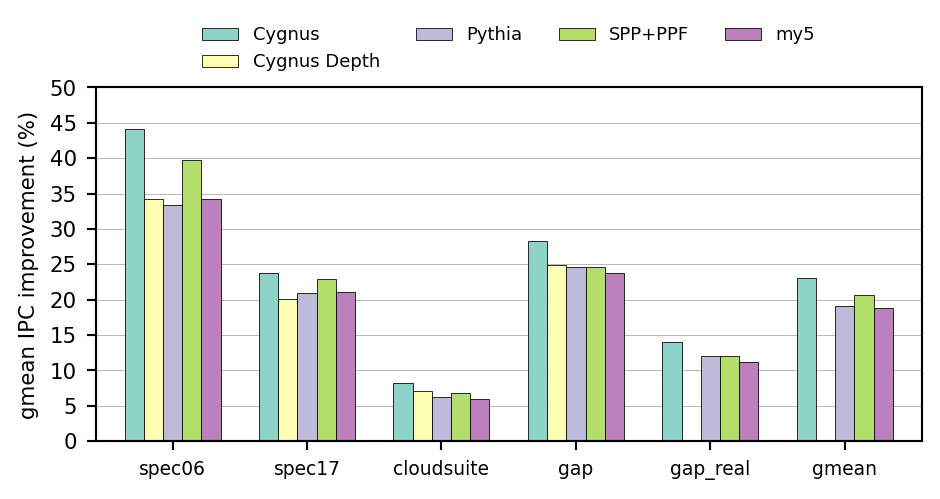

In [41]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

### spec06

In [20]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,113.490000,83.150000,85.320000,101.470000,57.69000
astar,7.410000,6.930000,6.840000,6.910000,1.72000
bwaves,56.550000,38.820000,37.070000,61.280000,31.60000
cactusADM,10.830000,9.830000,10.360000,10.620000,8.67000
gcc,39.450000,22.000000,19.600000,28.030000,27.30000
lbm,41.390000,32.630000,36.230000,43.440000,43.49000
leslie3d,87.700000,69.540000,66.930000,83.480000,60.17000
libquantum,110.310000,88.190000,82.720000,109.780000,112.88000
mcf,29.870000,30.880000,30.560000,11.990000,25.46000
milc,24.660000,15.630000,16.460000,29.060000,28.69000


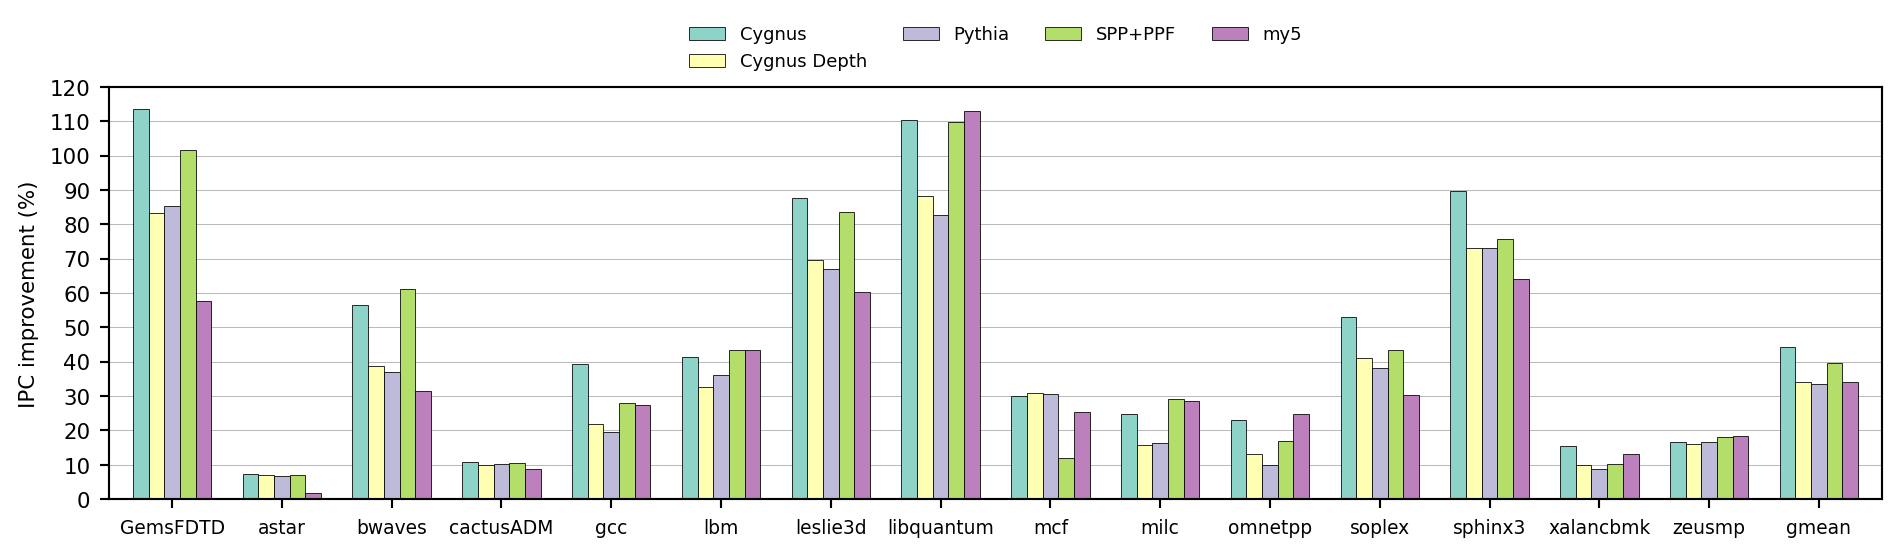

In [21]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### gap

In [22]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
bc,21.330000,20.750000,20.830000,17.830000,17.780000
bfs,60.680000,42.830000,43.590000,45.560000,37.640000
cc,38.820000,37.230000,36.360000,37.840000,38.750000
pr,2.320000,2.200000,2.280000,2.140000,2.030000
sssp,28.040000,24.880000,23.200000,25.180000,24.620000
tc,25.540000,25.410000,25.390000,23.950000,25.790000
gmean,28.256208,24.854806,24.578104,24.625932,23.785134


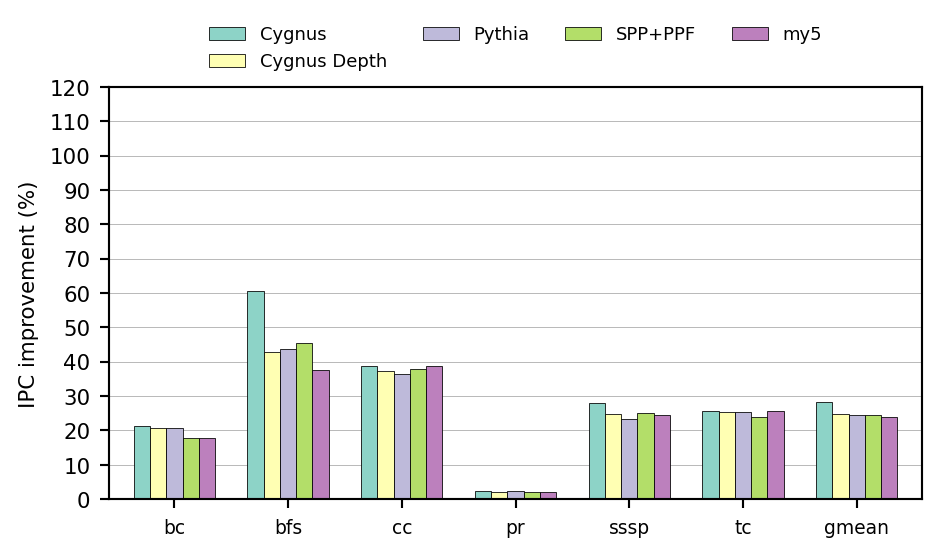

In [23]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### gap_real

In [24]:
reload(plot)
pd.set_option('display.max_rows', 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
bc__amazon-2008.mtx,9.760000,9.01,8.850000,7.980000,3.230000
bc__amazon0601.mtx,4.780000,4.63,4.590000,3.290000,1.980000
bc__belgium_osm.mtx,4.520000,3.93,3.910000,5.500000,3.110000
bc__citationCiteseer.mtx,5.260000,5.27,5.260000,3.450000,3.070000
bc__coAuthorsCiteseer.mtx,10.800000,10.75,10.590000,9.230000,4.500000
bc__coAuthorsDBLP.mtx,9.290000,9.09,8.970000,6.920000,4.130000
bc__coPapersCiteseer.mtx,24.070000,21.60,21.580000,22.860000,20.320000
bc__coPapersDBLP.mtx,23.320000,21.27,21.390000,22.370000,19.320000
bc__com-Youtube.mtx,14.380000,14.04,13.780000,11.420000,7.450000
bc__dblp-2010.mtx,15.030000,14.22,13.950000,13.260000,5.870000


## IPC

In [25]:
degreedyn_1core_df_plus_baseline = {
    'Baseline':     studies['stu_prefetchers']['_baseline'],
    'Cygnus':       studies['stu_prefetchers']['pf_cygnus'],
    'Cygnus Depth': studies['stu_prefetchers']['pf_cygnus_depth'],
    'Pythia':       studies['stu_prefetchers']['pf_pythia'],
    #'Bingo':   studies['stu_prefetchers']['pf_bingo'],
    #'SMS':     studies['stu_prefetchers']['pf_sms'],
    #'SPP':     studies['stu_prefetchers']['pf_spp'],
    'SPP+PPF': studies['stu_prefetchers']['pf_spp_ppf'],
    #'MLOP':    studies['stu_prefetchers']['pf_mlop'],
    #'DSPatch': studies['stu_prefetchers']['pf_dspatch'],
    'my5':     studies['stu_prefetchers']['pf_my5'],
}

reload(plot)
plot.get_suite_table(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Baseline,0.65,0.77,0.99,0.53,0.59,0.688705
Cygnus,0.93,0.96,1.07,0.68,0.67,0.846729
Cygnus Depth,0.87,0.93,1.06,0.66,NaN,NaN
Pythia,0.86,0.94,1.05,0.66,0.66,0.819560
SPP+PPF,0.91,0.95,1.06,0.66,0.66,0.832208
my5,0.87,0.94,1.05,0.65,0.66,0.818953


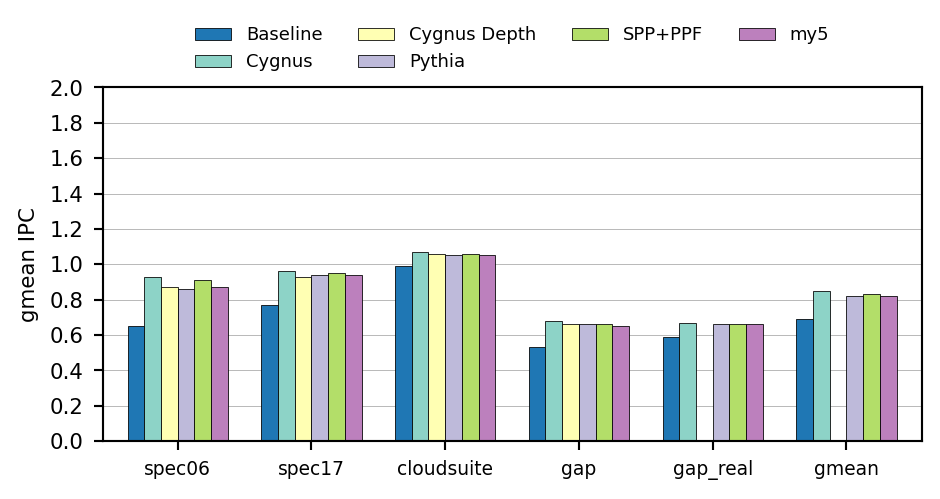

In [26]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC',
    ylim=(0, 2.0),
    ytick_distance=0.2,
    dpi=192, figsize=(5, 2.7))

### spec06

In [33]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True).T

,Baseline,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,0.580000,1.230000,1.050000,1.070000,1.160000,0.910000
astar,0.500000,0.540000,0.540000,0.540000,0.540000,0.510000
bwaves,0.930000,1.460000,1.300000,1.280000,1.500000,1.230000
cactusADM,0.890000,0.980000,0.980000,0.980000,0.980000,0.970000
gcc,0.650000,0.910000,0.790000,0.780000,0.830000,0.830000
lbm,0.980000,1.390000,1.300000,1.340000,1.410000,1.410000
leslie3d,0.780000,1.460000,1.320000,1.300000,1.430000,1.250000
libquantum,0.630000,1.330000,1.190000,1.160000,1.330000,1.350000
mcf,0.120000,0.150000,0.150000,0.150000,0.130000,0.150000
milc,0.860000,1.070000,1.000000,1.000000,1.110000,1.110000


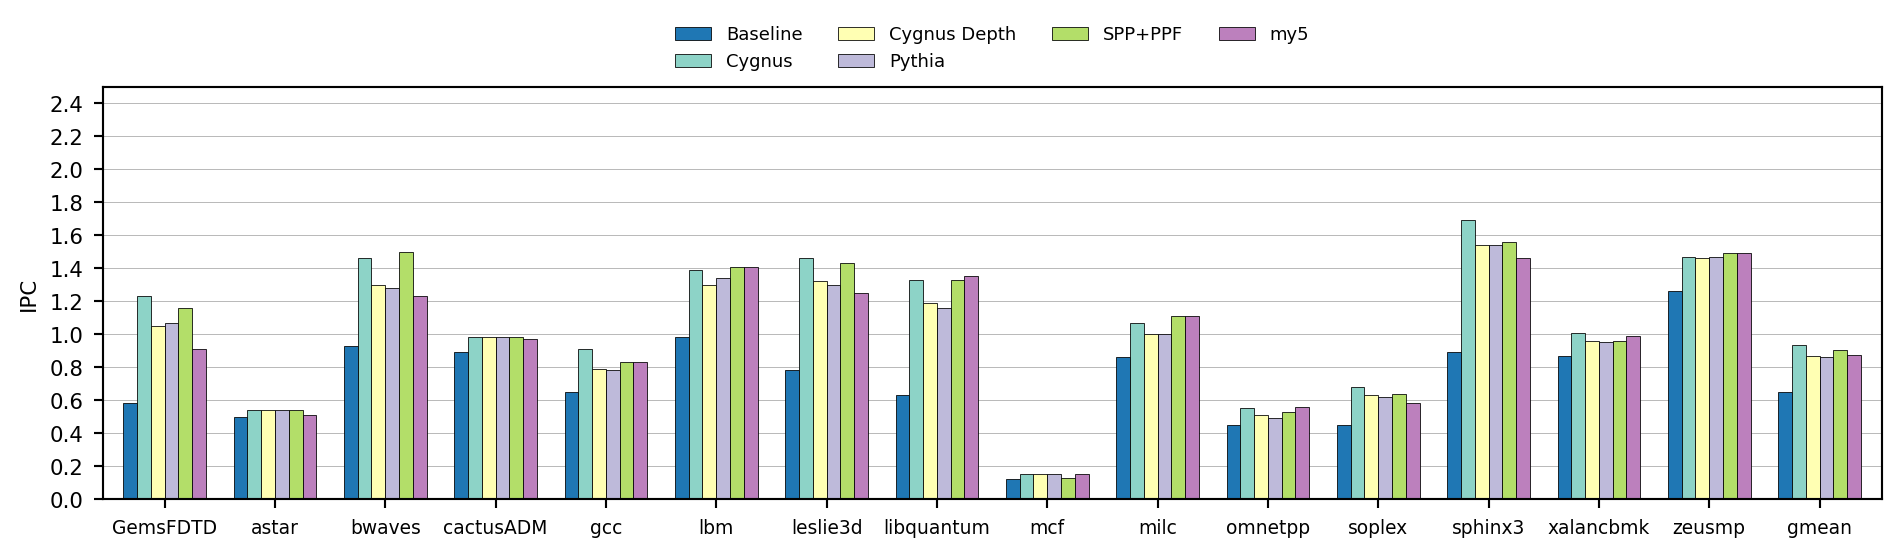

In [39]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC',
    ylim=(0, 2.5),
    ytick_distance=0.2,
    dpi=192, figsize=(10, 3))

## L2C accuracy

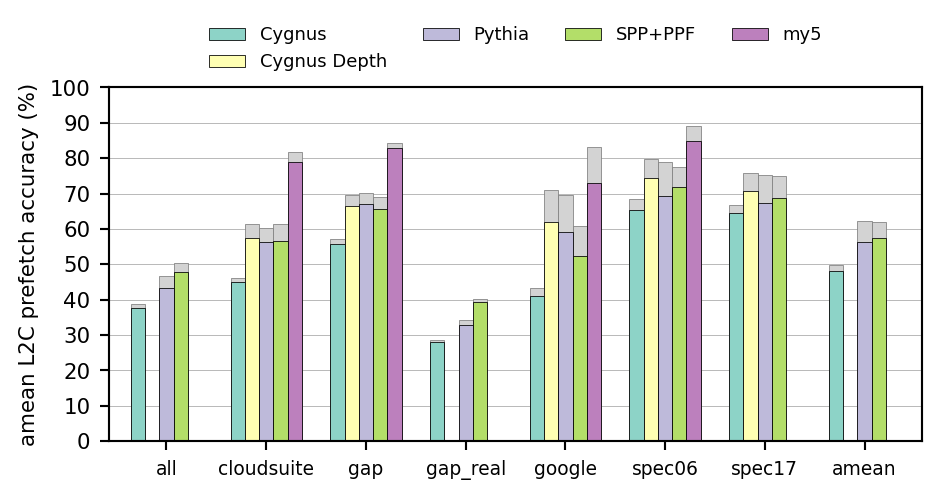

In [27]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [28]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_accuracy",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,83.510000,94.160000,93.280000,89.260,96.620000
astar,43.500000,57.650000,55.930000,53.010,79.430000
bwaves,98.950000,99.090000,99.540000,99.220,99.950000
cactusADM,99.540000,99.800000,99.910000,99.710,99.810000
gcc,33.950000,57.980000,58.120000,52.910,73.730000
lbm,99.910000,99.980000,99.990000,99.950,100.000000
leslie3d,93.890000,95.650000,98.010000,96.170,97.810000
libquantum,99.990000,100.000000,100.000000,100.000,100.000000
mcf,46.720000,47.120000,47.050000,53.310,85.740000
milc,57.110000,90.820000,84.810000,90.500,99.960000


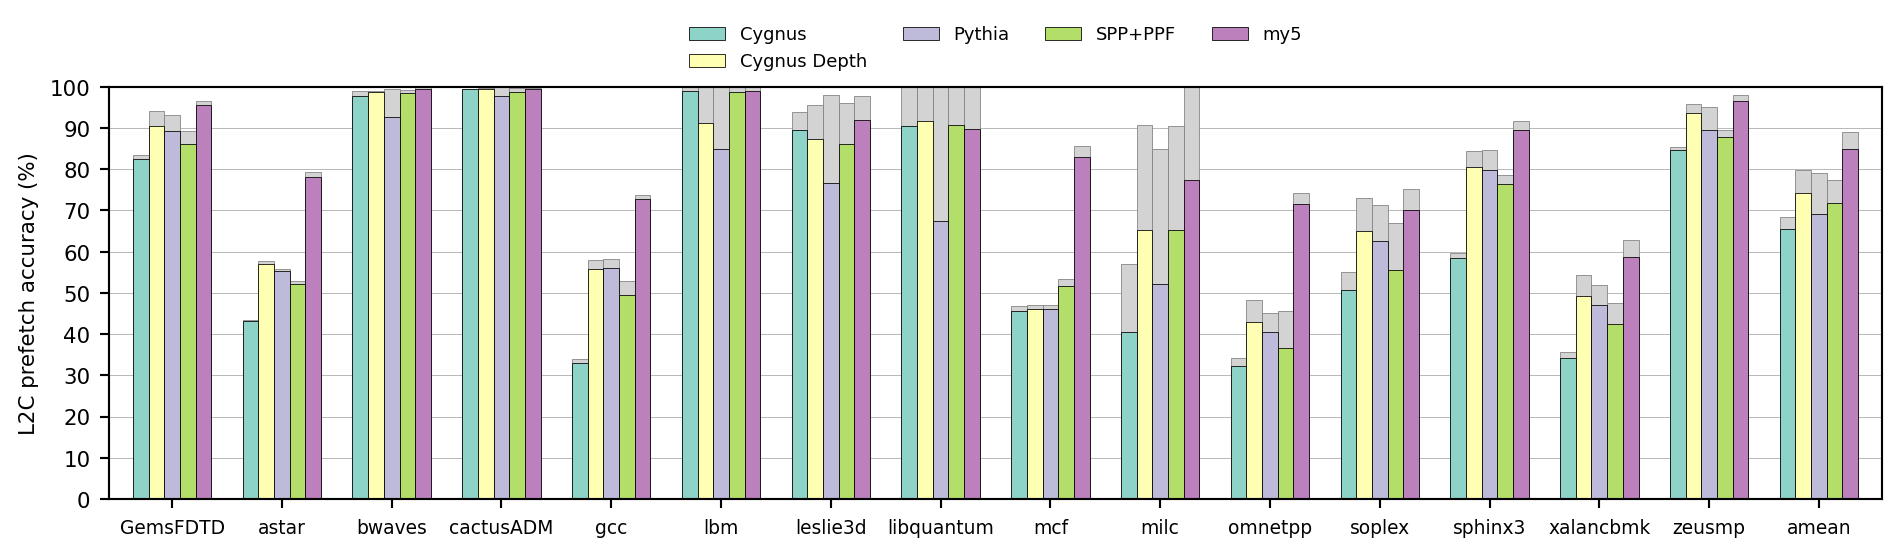

In [29]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))


## L2C coverage

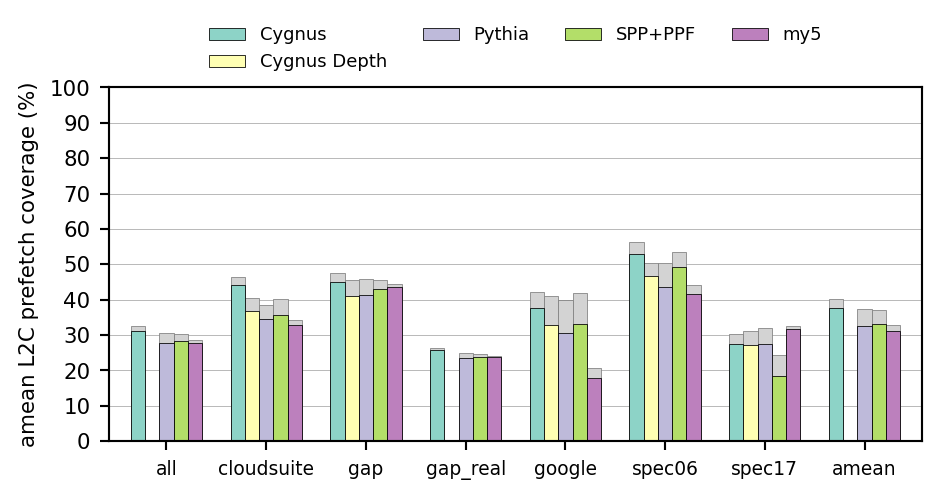

In [30]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [31]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,89.650000,81.440000,83.08,89.390000,59.180000
astar,14.550000,15.480000,15.15,16.870000,13.820000
bwaves,72.380000,61.970000,54.57,75.180000,39.090000
cactusADM,69.070000,66.290000,67.02,67.950000,50.060000
gcc,40.540000,30.030000,28.14,33.500000,31.380000
lbm,23.970000,19.950000,19.76,23.800000,23.980000
leslie3d,69.030000,61.460000,54.66,64.930000,48.840000
libquantum,87.150000,83.770000,64.90,86.730000,81.760000
mcf,29.010000,29.670000,29.39,13.030000,27.580000
milc,35.920000,33.190000,26.88,37.000000,36.060000


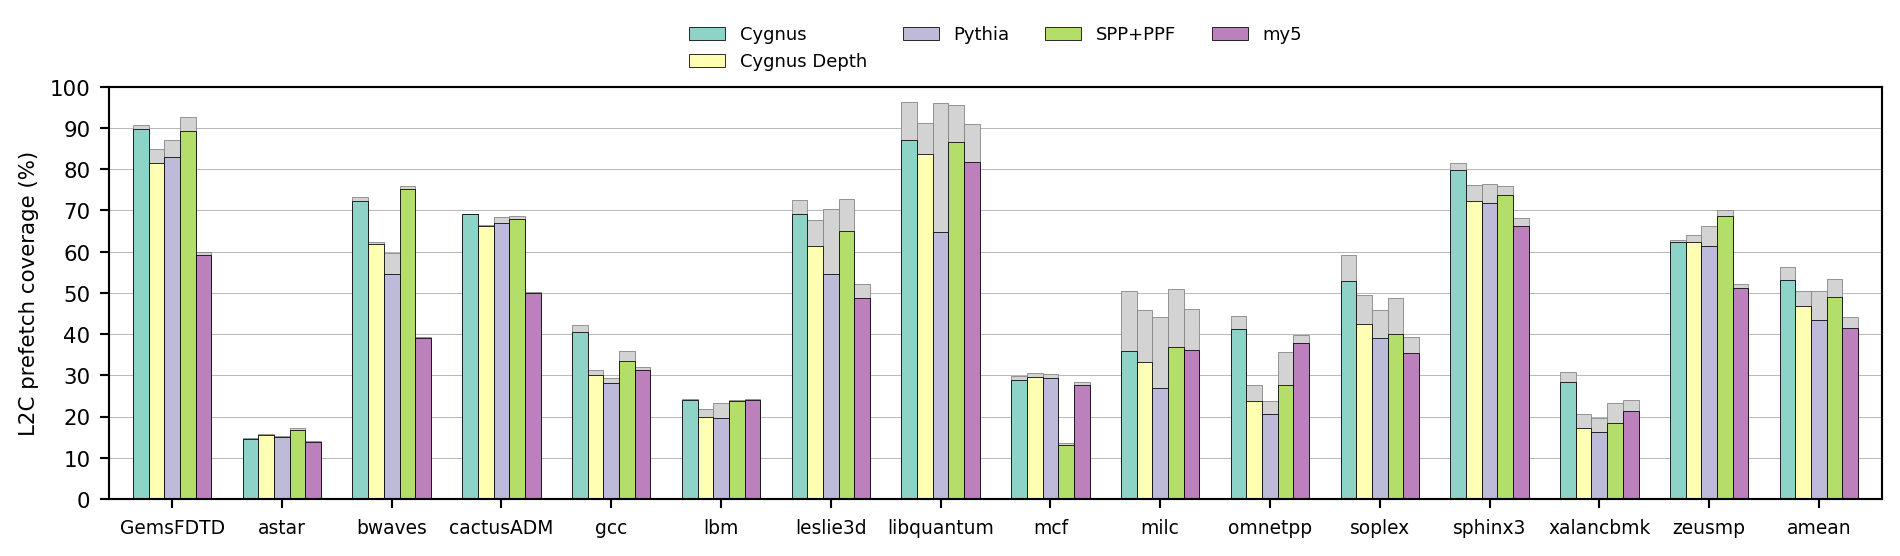

In [32]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))